### Training And Testing Available Data
We have a dataset containing prices of used BMW cars. We are going to analyze this dataset and build a prediction function that can predict a price by taking mileage and age of the car as input. We will use sklearn train_test_split method to split training and testing dataset

In [2]:
import pandas as pd
df = pd.read_csv("Datasets/carprices.csv")
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

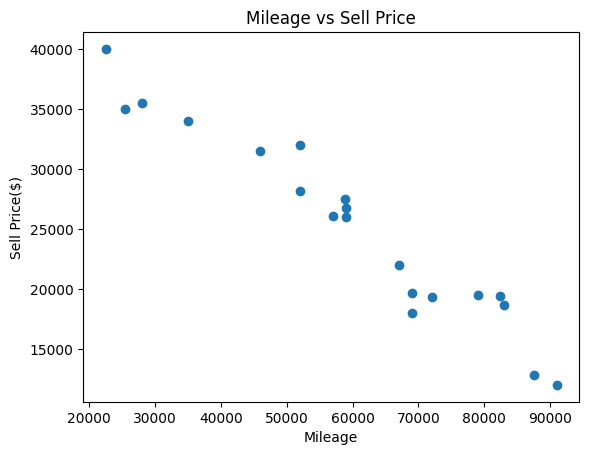

In [5]:
plt.title('Mileage vs Sell Price')
plt.xlabel('Mileage')
plt.ylabel('Sell Price($)')
plt.scatter(df['Mileage'],df['Sell Price($)'])
plt.show()

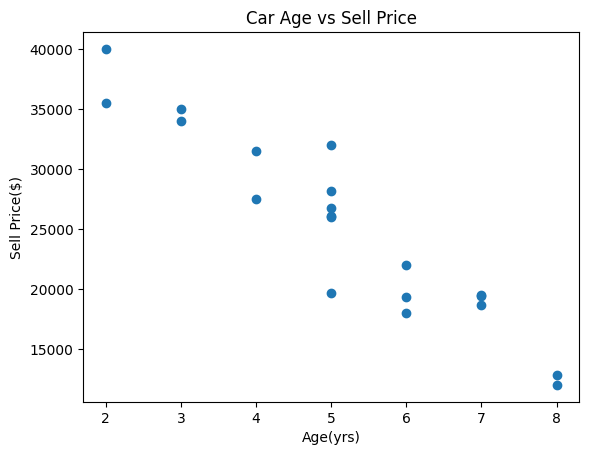

In [7]:
plt.title('Car Age vs Sell Price')
plt.xlabel('Age(yrs)')
plt.ylabel('Sell Price($)')
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])
plt.show()

Looking at above two scatter plots, using linear regression model makes sense as we can clearly see a linear relationship between our dependant (i.e. Sell Price) and independant variables (i.e. car age and car mileage)

```
The approach we are going to use here is to split available data in two sets
```

1. Training: We will train our model on this dataset
2. Testing: We will use this subset to make actual predictions using trained model

```
The reason we don't use same training set for testing is because our model has seen those samples before, using same samples for making predictions might give us wrong impression about accuracy of our model. It is like you ask same questions in exam paper as you tought the students in the class.
```

In [8]:
X = df[['Mileage','Age(yrs)']]
X

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [9]:
y = df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     26750
6     32000
7     19300
8     12000
9     22000
10    18700
11    19500
12    26000
13    27500
14    19400
15    35000
16    35500
17    19700
18    12800
19    28200
Name: Sell Price($), dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [11]:
X_train

,Mileage,Age(yrs)
12,59000,5
2,57000,5
5,59000,5
14,82450,7
19,52000,5
1,35000,3
18,87600,8
9,67000,6
13,58780,4
11,79000,7


In [12]:
X_test

,Mileage,Age(yrs)
6,52000,5
4,46000,4
16,28000,2
3,22500,2
0,69000,6
7,72000,6


In [13]:
y_train

12    26000
2     26100
5     26750
14    19400
19    28200
1     34000
18    12800
9     22000
13    27500
11    19500
8     12000
15    35000
17    19700
10    18700
Name: Sell Price($), dtype: int64

In [14]:
y_test

6     32000
4     31500
16    35500
3     40000
0     18000
7     19300
Name: Sell Price($), dtype: int64

In [15]:
#Lets run Linear Regression now
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [16]:
X_test

,Mileage,Age(yrs)
6,52000,5
4,46000,4
16,28000,2
3,22500,2
0,69000,6
7,72000,6


In [17]:
reg.predict(X_test)

array([27281.08935917, 29954.99903589, 36830.04768352, 38230.00786986,
       21807.25930977, 21043.64466268])

In [18]:
y_test

6     32000
4     31500
16    35500
3     40000
0     18000
7     19300
Name: Sell Price($), dtype: int64

In [19]:
reg.score(X_test,y_test)

0.8800825937198402

### Using random_state argument

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_test

,Mileage,Age(yrs)
7,72000,6
10,83000,7
5,59000,5
6,52000,5
3,22500,2
18,87600,8


In [21]:
reg.fit(X_train,y_train)

LinearRegression()

In [22]:
reg.predict(X_test)

array([20668.52722622, 16762.33242213, 25160.18381011, 27209.30003936,
       37903.32633702, 14729.61531335])

In [23]:
y_test

7     19300
10    18700
5     26750
6     32000
3     40000
18    12800
Name: Sell Price($), dtype: int64

In [24]:
reg.score(X_test,y_test)

0.921242248377633